In [321]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Convert Image to grayscale and resize it

In [322]:
image = cv2.imread('coins.jpg')
resized = cv2.resize(image, (400, 400), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Original Image (Gray Scale)')

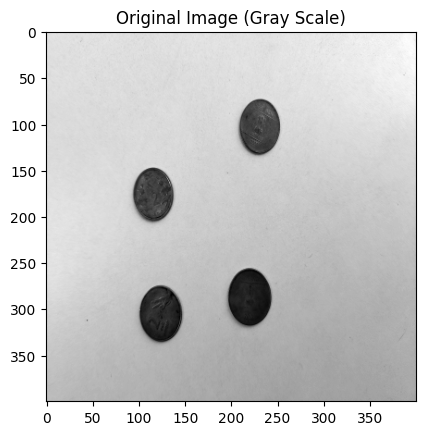

In [323]:
plt.imshow(gray, cmap='gray')
plt.title('Original Image (Gray Scale)')

### Blur the image for smoothing, after many trials came across the a guassian filter of size (9x9)

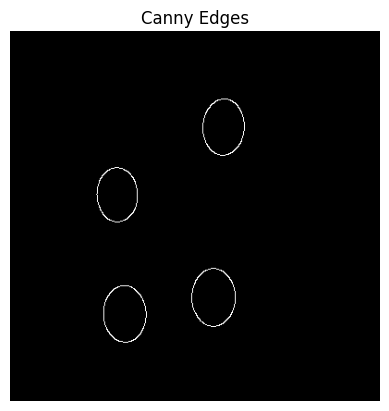

In [324]:
blur = cv2.GaussianBlur(gray, (9,9), 0)
canny = cv2.Canny(blur, 80, 150)
plt.title('Canny Edges')
plt.axis('off')
plt.imshow(canny, cmap='gray')

### Dilate the image to make the edges more clear

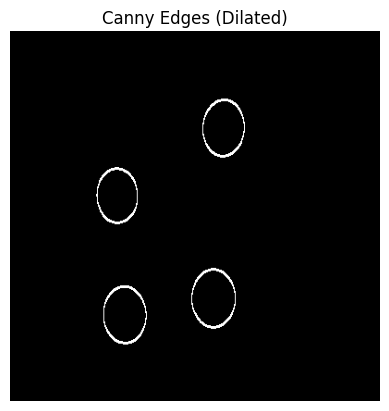

In [325]:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.title('Canny Edges (Dilated)')
plt.axis('off')
plt.imshow(dilated, cmap='gray')

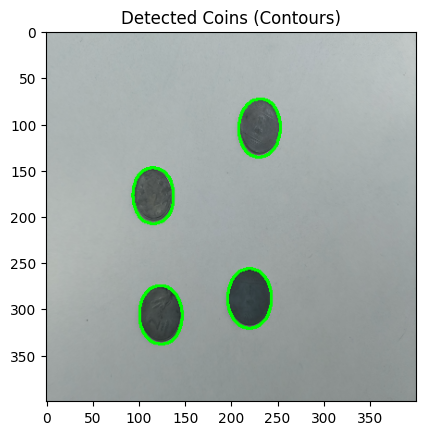

In [326]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour_img = resized.copy()
cv2.drawContours(contour_img, cnt, -1, (0,255,0), 2)
plt.title('Detected Coins (Contours)')
plt.imshow(contour_img)

In [327]:
from skimage import measure
from skimage import color,morphology

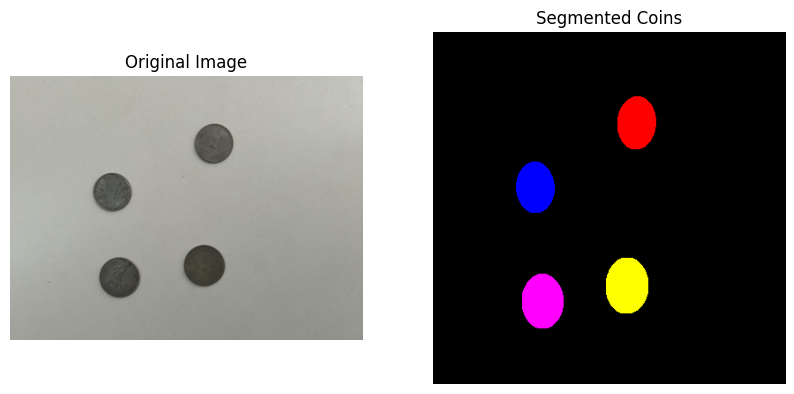

In [330]:
# Thresholding for segmentation
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to remove small noise
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify connected components
labels = measure.label(cleaned, connectivity=2)

# Remove small objects (less than 500 pixels)
labels = morphology.remove_small_objects(labels, min_size=500)

# Convert labels to a colored image
colored_labels = color.label2rgb(labels, bg_label=0)

# Convert to OpenCV format (uint8)
segmented_img = (colored_labels * 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Coins")
plt.imshow(colored_labels)
plt.axis("off")

plt.show()

## The number of coins in the image

In [331]:
num_coins = len(np.unique(labels)) - 1
print(f"Number of coins detected: {num_coins}")

Number of coins detected: 4
